<a href="https://colab.research.google.com/github/ridhapadelia/Data-Mining-Checkpoint-1/blob/main/Data_Mining_Checkpoint5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Tingkat Adaptibilitas Siswa Dan Mahasiswa Dalam Pendidikan Online Berdasarkan Faktor-Faktor Yang Mempengaruhi**

#**Import Library**

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari analisis ini adalah untuk mengevaluasi tingkat adaptabilitas siswa dan mahasiswa dalam pendidikan online dengan memahami faktor-faktor yang mempengaruhinya. Hal ini akan membantu institusi pendidikan dan pembuat kebijakan untuk meningkatkan efektivitas pendidikan online dan memberikan dukungan yang sesuai kepada siswa dan mahasiswa. Dengan ini, diharapkan dapat meningkatkan kualitas pembelajaran serta memperkuat adaptasi siswa dan mahasiswa di masa depan.



##**Assess Situation**

Situasi bisnis yang mendasari analisis ini adalah respons terhadap meningkatnya ketergantungan pada pembelajaran online akibat pandemi Covid-19 yang pernah melanda di hampir seluruh negara, juga dengan kondisi saat ini yang sudah mulai terbebas dari Covid-19 tetapi terkadang masih menggunakan pembelajaran secara online. Meskipun pembelajaran online menjadi solusi utama, terdapat tantangan dalam adaptasi siswa dan mahasiswa terhadap model pembelajaran ini.



##**Data Mining Goals**

Tujuan dari data mining pada dataset ini adalah untuk menganalisis dan mendalami tingkat adaptibilitas siswa dan mahasiswa dalam lingkungan pendidikan online dengan mempertimbangkan faktor-faktor yang mempengaruhi adaptibilitas mereka.



##**Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dengan pengumpulan data dari sumber data yang ada, lalu menyiapkan data dan menjelaskan karakteristik data serta pola-pola yang menarik akan diidentifikasi. Data kemudian dieksplorasi untuk mengidentifikasi korelasi antar variabel. Selanjutnya, melakukan analisis mendalam terhadap pola-pola yang ditemukan dan mengevaluasi relevansi korelasi tersebut terhadap tujuan analisis, lalu menginterpretasikan hasil analisis.



#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset "Students Adaptibilty Level In Online Education" ini diperoleh dari Kaggle, berikut tautannya: https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/ridhapadelia/Data-Mining-Checkpoint-1/main/students_adaptability_level_online_education.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


##**Describe Data**

####Informasi Dasar

In [66]:
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (1205, 14)


dataset "Students Adaptibility Level in Online Education" ini terdiri dari 1205 baris dan 14 kolom

####Informasi Lanjutan

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


**1. Kolom Gender**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai jenis kelamin siswa dan mahasiswa tersebut, apakah laki-laki atau perempuan (Male/Female).

**2. Kolom Age**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai rentang umur siswa dan mahasiswa.

**3. Kolom Education Level**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai tingkat pendidikan yang ditempuh (University, College, atau School).

**4. Kolom Institution Type**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai jenis institusi pendidikan siswa dan mahasiswa tersebut, apakah pemerintah atau bukan pemerintah (Goverment/Non Government).

**5. Kolom IT Student**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi yang menunjukkan apakah siswa dan mahasiswa tersebut termasuk siswa atau mahasiswa IT (Yes/No).

**6. Kolom Location**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai apakah siswa dan mahasiswa tersebut tinggal di daerah perkotaan (Yes/No).

**7. Kolom Load-Shedding**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai level pemadaman listrik di lokasi siswa dan mahasiswa tersebut tinggal, apakah sering dilakukan pemadaman atau jarang (Low/High).

**8. Kolom Financial Condition**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai kondisi finansial keluarga siswa atau mahasiswa tersebut apakah berkecukupan, menengah, atau kurang mampu. (Rich, Mid, Poor).

**9. Kolom Internet type**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai jenis koneksi internet yang digunakan oleh siswa dan mahasiswa, apakah menggunakan mobile data atau wifi.

**10. Kolom Network Type**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai jenis jaringan apa yang digunakan, apakah 4G, 2G atau 3G.

**11. Kolom Class Duration**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai durasi kelas yang dihadiri dalam pembelajaran online.

**12. Kolom Self Lms**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai apakah institusi menyediakan Lms (Learning Management System) bagi siswa dan mahasiswa.

**13. Kolom Device**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai perangkat-perangkat apa saja yang digunakan oleh siswa maupun mahasiswa dalam pembelajaran online, apakah melalui perangkat mobile, komputer, atau tab.

**14. Kolom Adaptivity Level**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi yang menunjukkan tingkat adaptablitas siswa maupun mahasiswa terhadap hadirnya pembelajaran online.

karena semua tipe data yang ada pada dataset ini merupakan tipe data object, disini saya akan merubah beberapa kolom yaitu kolom Age, Load-shedding, Financial Condition, dan Adaptivity level menjadi numerik.

In [68]:
age_mapping = {
    '1-5': 3,
    '6-10': 8,
    '11-15': 13,
    '16-20': 18,
    '21-25': 23,
    '25-30': 28
}
df['Age'] = df['Age'].map(age_mapping)

financial_mapping = {
    'Rich': 3,
    'Mid': 2,
    'Poor': 1
}
df['Financial Condition'] = df['Financial Condition'].map(financial_mapping)

load_shedding_mapping = {
    'Low': 1,
    'High': 2
}
df['Load-shedding'] = df['Load-shedding'].map(load_shedding_mapping)

adaptivity_mapping = {
    'Low': 1,
    'Moderate': 2,
    'High': 3
}
df['Adaptivity Level'] = df['Adaptivity Level'].map(adaptivity_mapping)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               1205 non-null   object 
 1   Age                  1137 non-null   float64
 2   Education Level      1205 non-null   object 
 3   Institution Type     1205 non-null   object 
 4   IT Student           1205 non-null   object 
 5   Location             1205 non-null   object 
 6   Load-shedding        1205 non-null   int64  
 7   Financial Condition  1205 non-null   int64  
 8   Internet Type        1205 non-null   object 
 9   Network Type         1205 non-null   object 
 10  Class Duration       1205 non-null   object 
 11  Self Lms             1205 non-null   object 
 12  Device               1205 non-null   object 
 13  Adaptivity Level     1205 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 131.9+ KB
None


Dapat terlihat disini pada kolom Age tipe data nya adalah float64 disini untuk rentang usia diwakilkan oleh nilai tengahnya seperti berikut'1-5'= 3, '6-10'= 8, '11-15'= 13, '16-20'= 18, '21-25'= 23, '25-30'= 28, begitupun pada kolom yang lain. Pada kolom Load-shedding tipe data nya int64 untuk tingkatanya 'Low'= 1, 'Moderate'= 2, 'High'= 3.  Pada kolom Financial Condition tipe data nya int64 untuk tingkatannya 'Low'= 1, 'High'= 2. Pada kolom Adaptivity Level tipe datanya int64 dengan tingkatannya 'Low'= 1, 'Moderate'= 2, 'High'= 3.

####Informasi Statistik Deskriptif

In [69]:
df.describe()

,Age,Load-shedding,Financial Condition,Adaptivity Level
count,1137.000000,1205.000000,1205.000000,1205.000000
mean,16.575198,1.166805,1.869710,1.684647
std,5.873657,0.372956,0.504584,0.618221
min,3.000000,1.000000,1.000000,1.000000
25%,13.000000,1.000000,2.000000,1.000000
50%,18.000000,1.000000,2.000000,2.000000
75%,23.000000,1.000000,2.000000,2.000000
max,23.000000,2.000000,3.000000,3.000000


**1. Kolom Age**
- Terdiri dari 1137 baris.
- Rata-rata usia responden adalah 16,57 dengan standar deviasi 5,87.
- Minimal usia responden adalah 3 tahun dan maksimalnya 23 tahun.
- 25% dari responden berusia 13 tahun, 50% dari responden berusia 18 tahun dan 75% dari responden berusia 23 tahun.

**2. Kolom Load-shedding**
- Terdiri dari 1205 baris.
- Rata-rata skor untuk Load-Shedding adalah 1,17 yang artinya kebanyakan responden menjawab bahwa tingkat pemadaman listrik yang terjadi cukup rendah,  dengan standar deviasi 0,37.
- Nilai minimum adalah 1 dan maksimum adalah 2.

**3. Kolom Financial Condition**
- Terdiri dari 1205 baris.
- Rata-rata skor adalah 1,87 dengan standar deviasi 0,50.
- Nilai minimum adalah 1 dan maksimum adalah 3.
- Rata-rata responden menjawab 2 yang artinya kondisi finansial responden berada pada tingkat menengah.

**4. Kolom Adaptivity Level**
- Terdiri dari 1205 baris.
- Rata-rata adaptivity level adalah 1,68.
- Nilai minimum adalah 1 dan maksimum adalah 3.


##**Exploratory Data Analysis**

**Perangkat apa yang paling banyak digunakan oleh siswa maupun mahasiswa dalam pembelajaran online?**

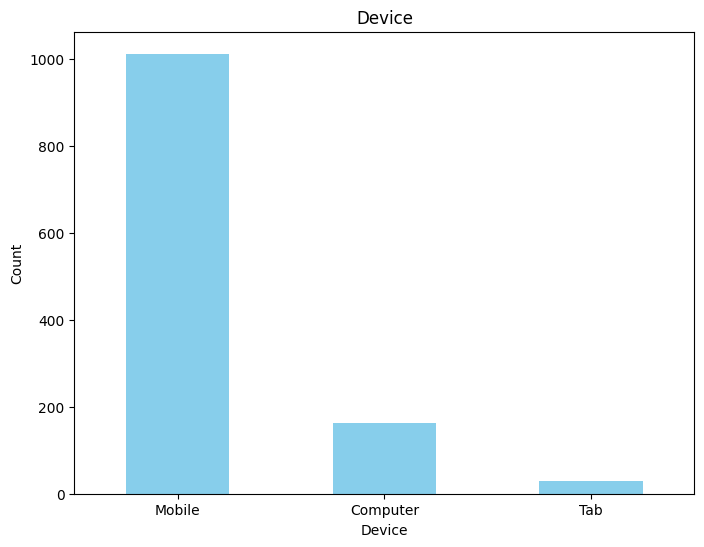

In [70]:
plt.figure(figsize=(8, 6))
df['Device'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Dari visualisasi yang tersaji di atas, terlihat bahwa perangkat mobile merupakan perangkat yang paling banyak digunakan oleh siswa dan mahasiswa dalam pembelajaran online ini, kemudian perangkat komputer dan yang terakhir perangkat tab yang termasuk sangat jarang digunakan.

<Axes: ylabel='Location'>

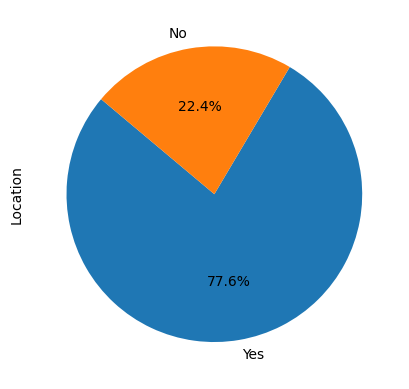

In [71]:
gender_counts  = df['Location'].value_counts()
gender_counts.plot(kind='pie',
                   autopct='%1.1f%%',
                   startangle=140)

Dari visualisasi yang tersaji di atas, terlihat bahwa mayoritas siswa dan mahasiswa berlokasi di daerah perkotaan yaitu dengan persentase sebesar 77,6% yang menjawab Yes dan sisanya yaitu sebesar 22,4% berlokasi di luar dari daerah perkotaan.

**Apakah Siswa dan Mahasiswa berasal dari jurusan IT?**

<ipython-input-72-0542546578a2>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='IT Student', ylabel='count'>

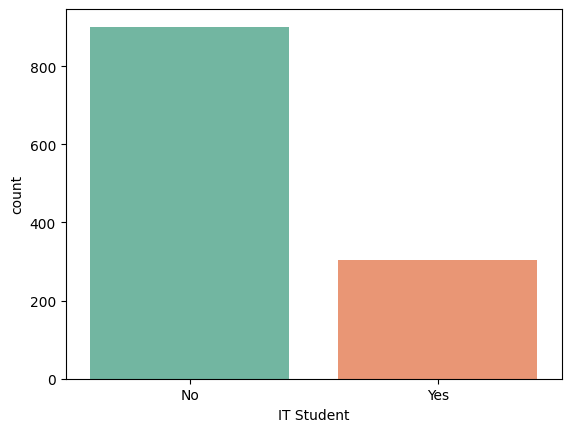

In [72]:
sns.countplot(x='IT Student', data=df, palette='Set2')

Dari visualisasi data mengenai IT Student yang tersaji di atas, terlihat bahwa mayoritas siswa dan mahasiswa dalam dataset menjawab NO, hal ini menunjukkan bahwa responden siswa dan mahasiswa yang berpartisispasi dalam pembelajaran online ini dominan tidak berasal dari jurusan IT.

<Axes: ylabel='Education Level'>

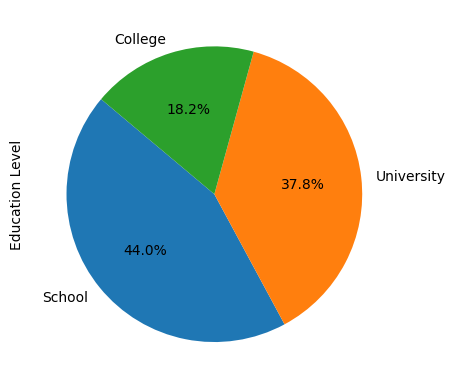

In [73]:
gender_counts  = df['Education Level'].value_counts()
gender_counts.plot(kind='pie',
                   autopct='%1.1f%%',
                   startangle=140)

Dari visualisasi yang tersaji di atas, terlihat bahwa mayoritas responden yang berpartisipasi dalam pembelajaran online ini adalah siswa yang ada pada tingkat pendidikan sekolah yaitu dengan persentase sebesar 44%.

<Axes: xlabel='Age', ylabel='Count'>

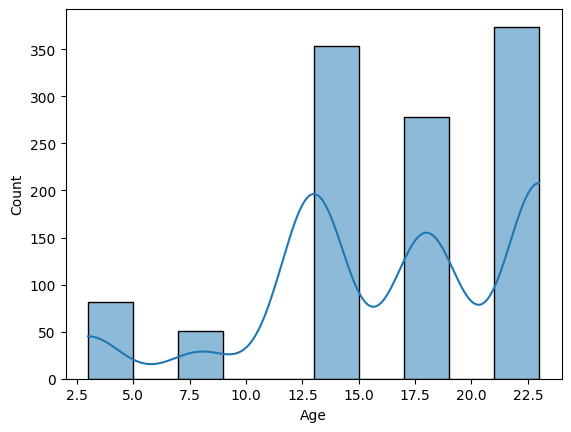

In [74]:
sns.histplot(df['Age'].dropna(), bins=10, kde=True)

Dari Visualisasi yang tersaji di atas, terlihat bahwa data umur berdistribusi tidak normal karena frekuensi setiap rentang usia tidak cukup merata.

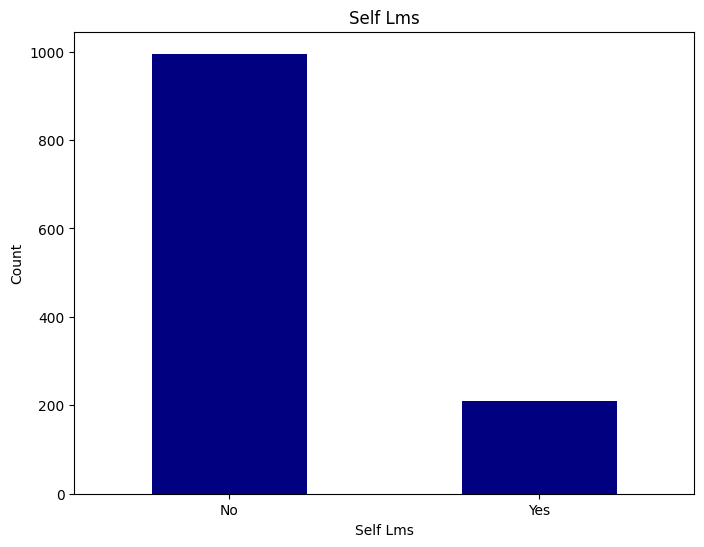

In [75]:
plt.figure(figsize=(8, 6))
df['Self Lms'].value_counts().plot(kind='bar', color='navy')
plt.title('Self Lms')
plt.xlabel('Self Lms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Dari visualisasi yang tersaji di atas, terlihat bahwa mayoritas siswa dan mahasiswa menjawab No, artinya institusi pendidikan siswa dan mahasiswa tersebut tidak menyediakan Lms mereka sendiri.

Korelasi Pearson

<Axes: >

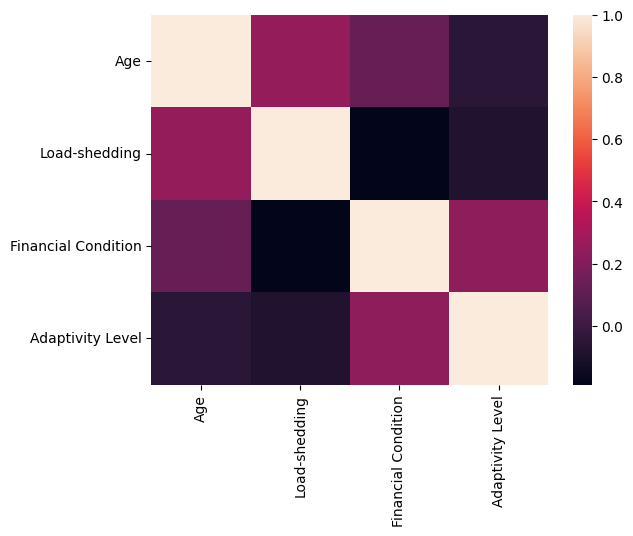

In [76]:
sns.heatmap(df.corr(numeric_only=True))

Korelasi antara kolom Age dan Financial Condition tidak ada keterkaitan.

Korelasi Kontingensi

In [77]:
data = df

contingency_table = pd.crosstab(df['Location'], df['Network Type'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
phi_corr = chi2 / n
min_dim = min(contingency_table.shape) - 1
cramer_v = (phi_corr / min_dim) ** 0.5

print("Tabel Kontingensi:")
print(contingency_table)
print("\nNilai Chi-square:", chi2)
print("Nilai p:", p)
print("Koefisien Korelasi Cramer's V:", cramer_v)

Tabel Kontingensi:
Network Type  2G   3G   4G
Location                  
No            14  117  139
Yes            5  294  636

Nilai Chi-square: 46.32880652031122
Nilai p: 8.70617690465965e-11
Koefisien Korelasi Cramer's V: 0.19607942865203182


Korelasi yang disajikan merupakan korelasi antara variabel Location dan Network Type. Hasilnya menunjukkan bahwa terdapat hubungan yang signifikan antara dua variabel tersebut (diliat dari nilai Chi-Square yang cukup tinggi), artinya ada pola yang jelas dalam bagaimana lokasi siswa dan mahasiswa terkait dengan jenis jaringan yang mereka gunakan. Namun, korelasi ini bersifat lemah hingga sedang yang berarti bahwa meskipun ada hubungan antara kedua variabel, hubungannya tidak terlalu kuat.

##**Verify Data Quality**

####Missing Values

In [78]:
pd.DataFrame(df.isna().sum() / len(df) *100, columns=['Null Ratio in '])

,Null Ratio in
Gender,0.000000
Age,5.643154
Education Level,0.000000
Institution Type,0.000000
IT Student,0.000000
Location,0.000000
Load-shedding,0.000000
Financial Condition,0.000000
Internet Type,0.000000
Network Type,0.000000


Dapat terlihat dari output di atas 13 kolom yang ada yaitu kolom Gender, Education Level, Institution Type, IT Student, Location, Load-shedding, Financial Condition, Internet Type, Network Type, Class Duration, Self Lms, Device, Adaptivity Level tidak memiliki nilai null di dalamnya, sedangkan pada kolom Age memiliki nilai null di dalamnya.

####Outliers Values

In [79]:
def count_values(col):
  counts = col.value_counts()
  return counts

def detect_outliers(col):

  counts = count_values(col)

  n = len(col)
  threshold = n * 0.05

  outliers = counts[counts < threshold].index

  if len(outliers) > 0:
    print(f"Terdeteksi outlier pada kolom {col.name}:")
    print(outliers)
  else:
    print(f"Tidak ada outlier pada kolom {col.name}")

for col in df.columns:
  detect_outliers(df[col])

Tidak ada outlier pada kolom Gender
Terdeteksi outlier pada kolom Age:
Float64Index([8.0], dtype='float64')
Tidak ada outlier pada kolom Education Level
Tidak ada outlier pada kolom Institution Type
Tidak ada outlier pada kolom IT Student
Tidak ada outlier pada kolom Location
Tidak ada outlier pada kolom Load-shedding
Tidak ada outlier pada kolom Financial Condition
Tidak ada outlier pada kolom Internet Type
Terdeteksi outlier pada kolom Network Type:
Index(['2G'], dtype='object')
Tidak ada outlier pada kolom Class Duration
Tidak ada outlier pada kolom Self Lms
Terdeteksi outlier pada kolom Device:
Index(['Tab'], dtype='object')
Tidak ada outlier pada kolom Adaptivity Level


Dapat terlihat disini terdapat 3 kolom yang terdeteksi outlier yaitu kolom Age, kolom Network Type dan kolom Device. Nilai-nilai yang terdeteksi outlier ini merupakan data-data yang extrem/tidak wajar. Dan untuk kolom-kolom yang tidak terdeteksi outlier, artinya variasi nilai pada kolom tersebut wajar.

####Duplicated Values

In [80]:

for column in df.columns:
    if df[column].duplicated().any():
        print(f"Kolom '{column}' memiliki nilai duplikat.")
    else:
        print(f"Tidak ada nilai duplikat dalam kolom '{column}'.")


Kolom 'Gender' memiliki nilai duplikat.
Kolom 'Age' memiliki nilai duplikat.
Kolom 'Education Level' memiliki nilai duplikat.
Kolom 'Institution Type' memiliki nilai duplikat.
Kolom 'IT Student' memiliki nilai duplikat.
Kolom 'Location' memiliki nilai duplikat.
Kolom 'Load-shedding' memiliki nilai duplikat.
Kolom 'Financial Condition' memiliki nilai duplikat.
Kolom 'Internet Type' memiliki nilai duplikat.
Kolom 'Network Type' memiliki nilai duplikat.
Kolom 'Class Duration' memiliki nilai duplikat.
Kolom 'Self Lms' memiliki nilai duplikat.
Kolom 'Device' memiliki nilai duplikat.
Kolom 'Adaptivity Level' memiliki nilai duplikat.


Dataset ini memiliki Duplicated Values (nilai yang duplikat) dari masing-masing kolom. Dapat terlihat dari output di atas semua kolom yang ada yaitu kolom Gender, Age, Education Level, Institution Type, IT Student, Location, Load-shedding, Financial Condition, Internet Type, Network Type, Class Duration, Self Lms, Device, Adaptivity Level memiliki nilai duplikat di dalamnya. Hal ini disebabkan karena dataset ini didapatkan dari survei/kuesioner yang diisi oleh responden, maka wajar jika responden ada yang memilih jawaban yang sama untuk pertanyaan-pertanyaan tertentu, jumlah responden juga cukup banyak yaitu 1205 responden oleh karena itu jawabannya bisa saja sama.

####Inconsistent Values / Noise (Optional)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

In [ ]:
print((df.isna().sum() / len(df)) * 100)

Gender                 0.000000
Age                    5.643154
Education Level        0.000000
Institution Type       0.000000
IT Student             0.000000
Location               0.000000
Load-shedding          0.000000
Financial Condition    0.000000
Internet Type          0.000000
Network Type           0.000000
Class Duration         0.000000
Self Lms               0.000000
Device                 0.000000
Adaptivity Level       0.000000
dtype: float64


Terdapat nilai yang hilang pada kolom Age

In [81]:
df[df['Age'].isnull()]

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
16,Girl,NaN,University,Government,Yes,Yes,1,1,Mobile Data,4G,0,No,Computer,1
27,Boy,NaN,University,Non Government,Yes,Yes,1,2,Wifi,4G,3-6,No,Computer,2
38,Girl,NaN,University,Government,No,No,1,1,Mobile Data,4G,1-3,No,Mobile,1
53,Boy,NaN,University,Government,Yes,No,1,1,Mobile Data,4G,1-3,No,Mobile,2
65,Boy,NaN,University,Government,No,No,1,2,Mobile Data,4G,1-3,No,Mobile,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,Boy,NaN,University,Government,Yes,Yes,1,3,Wifi,4G,1-3,No,Computer,3
1157,Boy,NaN,University,Government,Yes,Yes,1,3,Wifi,4G,1-3,No,Computer,3
1171,Boy,NaN,University,Government,Yes,Yes,1,3,Wifi,4G,1-3,No,Mobile,3
1176,Boy,NaN,University,Government,Yes,Yes,1,3,Wifi,4G,1-3,No,Computer,3


#####**Hapus Missing Values**

Karena persentase nilai kosong pada kolom Age hanya sebesar 5,64% maka tidak perlu menghapus missing values tetapi melakukan imputasi missing values.

#####**Imputasi Missing Values**

 Imputasi dilakukan menggunakan nilai analisis statistik kolom Age

In [82]:
df['Age'].dropna().describe()

count    1137.000000
mean       16.575198
std         5.873657
min         3.000000
25%        13.000000
50%        18.000000
75%        23.000000
max        23.000000
Name: Age, dtype: float64

Disini saya menggunakan mean dari kolom Age untuk imputasi nilai kosong tersebut

In [83]:
df['Age'] = df['Age'].fillna(df['Age'].dropna().mean())

#####**Pengecekkan Ulang**

In [84]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Gender,0.0
Age,0.0
Education Level,0.0
Institution Type,0.0
IT Student,0.0
Location,0.0
Load-shedding,0.0
Financial Condition,0.0
Internet Type,0.0
Network Type,0.0


Sekarang kolom Age sudah memiliki nilai.

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [85]:
df[df.duplicated()]

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
28,Girl,3.0,School,Non Government,No,Yes,1,2,Mobile Data,4G,1-3,No,Mobile,2
29,Girl,18.0,College,Non Government,No,Yes,2,2,Wifi,4G,3-6,No,Mobile,2
34,Boy,13.0,School,Non Government,No,Yes,1,1,Mobile Data,3G,1-3,No,Mobile,1
42,Girl,18.0,School,Non Government,No,Yes,1,1,Mobile Data,3G,0,No,Mobile,1
43,Boy,13.0,School,Non Government,No,Yes,1,2,Mobile Data,4G,1-3,No,Mobile,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,18.0,College,Non Government,No,Yes,1,2,Wifi,4G,1-3,No,Mobile,1
1201,Girl,18.0,College,Non Government,No,No,2,2,Wifi,4G,3-6,No,Mobile,2
1202,Boy,13.0,School,Non Government,No,Yes,1,2,Mobile Data,3G,1-3,No,Mobile,2
1203,Girl,18.0,College,Non Government,No,No,1,2,Wifi,4G,1-3,No,Mobile,1


Dapat terlihat dari output di atas bahwa terdapat nilai duplikat pada dataset ini.

#####**Hapus Nilai Duplikat**

In [86]:
df = df.drop_duplicates()

Disini saya menghapus nilai duplikat yang ada pada dataset.

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [87]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Age,0.000000
Load-shedding,21.093750
Financial Condition,28.515625
Adaptivity Level,0.000000


Dapat terlihat disini bahwa ada 2 kolom yang terdapat outliers yaitu kolom Load-shedding dan Financial Condition.

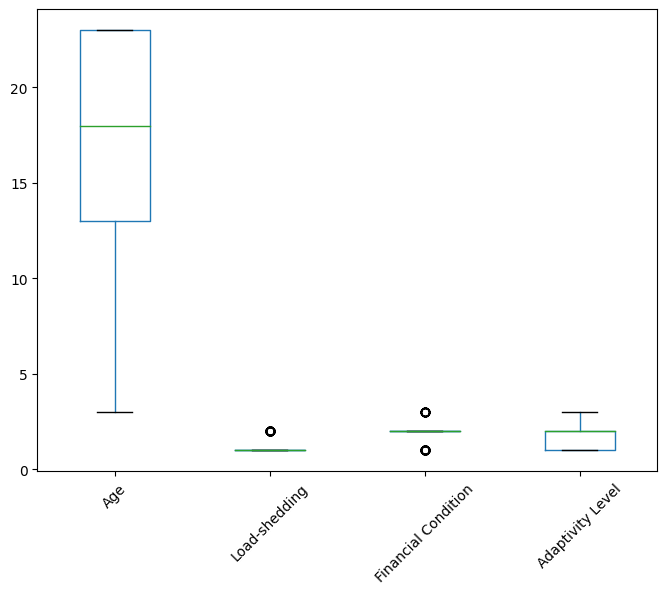

In [88]:
boxplot = df.boxplot(grid=False, rot=45, figsize=(8,6))

#####**Hapus Outliers**

#####**Imputasi Outliers**

In [89]:
Q1 = df['Financial Condition'].quantile(0.25)
Q3 = df['Financial Condition'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Financial Condition']=np.where(df['Financial Condition']>upper_whisker,upper_whisker,np.where(df['Financial Condition']<lower_whisker,lower_whisker,df['Financial Condition']))

<ipython-input-89-2d67d990ffe3>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
Q1 = df['Load-shedding'].quantile(0.25)
Q3 = df['Load-shedding'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Load-shedding']=np.where(df['Load-shedding']>upper_whisker,upper_whisker,np.where(df['Load-shedding']<lower_whisker,lower_whisker,df['Load-shedding']))

<ipython-input-90-cb15adb842ab>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Disini saya melakukan imputasi outlier yang ada pada kolom Load-shedding dan Financial Condition.

#####**Pengecekkan Ulang**

In [91]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Age,0.0
Load-shedding,0.0
Financial Condition,0.0
Adaptivity Level,0.0


Dapat dilihat dari output di atas semua kolom sudah tidak memiliki outlier.

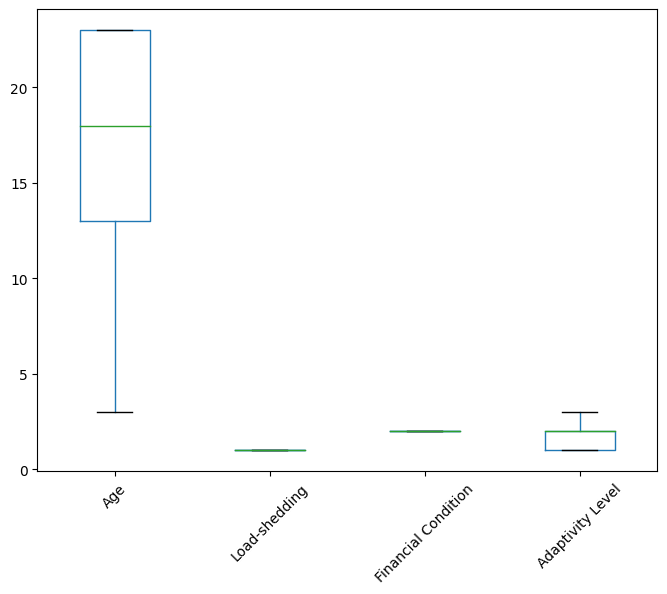

In [92]:
boxplot = df.boxplot(grid=False, rot=45, figsize=(8,6))

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [93]:
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 60:
        return 'Adult'
    else:
        return 'Elderly'

df['AgeCategory'] = df['Age'].apply(categorize_age)

<ipython-input-93-3a07a0e8b6e8>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Disini saya membuat kategori usia (AgeCategory) berdasarkan nilai usia dalam dataframme
- Jika usia kurang dari 18 tahun maka akan dikategorikan sebagai 'Child'
- Jika usia antara 18 hingga kurang dari 60 tahun maka akan dikategorikan sebagai 'Adult'
- Jika usia 60 keatas maka akan dikategorikan sebagai 'Elderly'

###**Pengecekkan Hasil**

In [94]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,AgeCategory
0,Boy,23.0,University,Non Government,No,Yes,1.0,2.0,Wifi,4G,3-6,No,Tab,2,Adult
1,Girl,23.0,University,Non Government,No,Yes,1.0,2.0,Mobile Data,4G,1-3,Yes,Mobile,2,Adult
2,Girl,18.0,College,Government,No,Yes,1.0,2.0,Wifi,4G,1-3,No,Mobile,2,Adult
3,Girl,13.0,School,Non Government,No,Yes,1.0,2.0,Mobile Data,4G,1-3,No,Mobile,2,Child
4,Girl,18.0,School,Non Government,No,Yes,1.0,2.0,Mobile Data,3G,0,No,Mobile,1,Adult


Dapat terlihat disini bahwa terdapat kolom baru yaitu AgeCategory yang menampilkan kategori usia dari nilai pada kolom Age

#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [95]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [96]:
df = df.drop(['Institution Type', 'Class Duration'], axis=1)

Disini saya akan menghapus fitur yang kurang relevan. Ada 2 kolom yang saya hapus yaitu kolom Institution Type dan kolom Class Duration.

###**Pengecekkan Hasil**

In [97]:
df.head()

,Gender,Age,Education Level,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level,AgeCategory
0,Boy,23.0,University,No,Yes,1.0,2.0,Wifi,4G,No,Tab,2,Adult
1,Girl,23.0,University,No,Yes,1.0,2.0,Mobile Data,4G,Yes,Mobile,2,Adult
2,Girl,18.0,College,No,Yes,1.0,2.0,Wifi,4G,No,Mobile,2,Adult
3,Girl,13.0,School,No,Yes,1.0,2.0,Mobile Data,4G,No,Mobile,2,Child
4,Girl,18.0,School,No,Yes,1.0,2.0,Mobile Data,3G,No,Mobile,1,Adult


Dapat terlihat dari data di atas bahwa kolom Institution Type dan kolom Class Duration sudah tidak ada pada dataset.

#**Data Transformation**

###**Mapping**

In [98]:
df['Gender'] = df['Gender'].map({'Boy':1,'Girl':0})
df['AgeCategory'] = df['AgeCategory'].map({'Child': 0, 'Adult': 1,'Elder': 2}).astype(int)
df['Education Level'] = df['Education Level'].map({'University':0,'College':1,'School':2})
df['IT Student'] = df['IT Student'].map({'No':0,'Yes':1})
df['Location'] = df['Location'].map({'No':0,'Yes':1})
df['Internet Type'] = df['Internet Type'].map({'Wifi':0,'Mobile Data':1})
df['Network Type'] = df['Network Type'].map({'4G':0,'3G':1,'2G':2})
df['Self Lms'] = df['Self Lms'].map({'No':0,'Yes':1})
df['Device'] = df['Device'].map({'Mobile':0,'Computer':1,'Tab':2})

In [99]:
df

,Gender,Age,Education Level,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level,AgeCategory
0,1,23.0,0,0,1,1.0,2.0,0,0,0,2,2,1
1,0,23.0,0,0,1,1.0,2.0,1,0,1,0,2,1
2,0,18.0,1,0,1,1.0,2.0,0,0,0,0,2,1
3,0,13.0,2,0,1,1.0,2.0,1,0,0,0,2,0
4,0,18.0,2,0,1,1.0,2.0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,1,23.0,0,1,0,1.0,2.0,1,1,0,1,1,1
1132,1,18.0,1,0,1,1.0,2.0,1,1,0,0,2,1
1149,0,18.0,1,0,0,1.0,2.0,1,1,1,0,1,1
1160,1,23.0,0,1,0,1.0,2.0,1,1,1,0,2,1


Disini saya mengubah data yang sebelumnya data kategorikal direpresentasikan menjadi data numerik agar dapat digunakan dalam permodelan.

###**Encoding**

In [100]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [101]:
df.head()

,Gender,Age,Education Level,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level,AgeCategory
0,1,23.0,0,0,1,1.0,2.0,0,0,0,2,2,1
1,0,23.0,0,0,1,1.0,2.0,1,0,1,0,2,1
2,0,18.0,1,0,1,1.0,2.0,0,0,0,0,2,1
3,0,13.0,2,0,1,1.0,2.0,1,0,0,0,2,0
4,0,18.0,2,0,1,1.0,2.0,1,1,0,0,1,1


Dapat terlihat disini bahwa semua nilai telah direpresentasikan menjadi numerik.

#**Konversi DataFrame Ke File CSV**

In [102]:
df.to_csv("Data Cleaned.csv", index=False)

#**Modelling**

#**Import Library dan Resource yang akan digunakan**

**Core Library**

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Library untuk Splitting Data**

In [104]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [105]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [106]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**Inisiasi Variabel untuk menyimpan Dataframe**

In [107]:
df = pd.read_csv('https://raw.githubusercontent.com/ridhapadelia/Data-Mining-Checkpoint-1/main/Data%20Cleaned.csv')

In [108]:
df.head()

,Gender,Age,Education Level,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level,AgeCategory
0,1,23.0,0,0,1,1.0,2.0,0,0,0,2,2,1
1,0,23.0,0,0,1,1.0,2.0,1,0,1,0,2,1
2,0,18.0,1,0,1,1.0,2.0,0,0,0,0,2,1
3,0,13.0,2,0,1,1.0,2.0,1,0,0,0,2,0
4,0,18.0,2,0,1,1.0,2.0,1,1,0,0,1,1


#**Modelling Predict**

Pada proses permodelan ini, saya menggunakan model klasifikasi (prediktif) karena sesuai dengan tujuan analisis saya. Disini saya akan memanfaatkan faktor-faktor lain di dalam dataset untuk memprediksi tingkat adaptabilitas siswa dan mahasiswa dalam pembelajaran online. Sehingga dapat mengidentifikasi faktor apa saja yang paling berpengaruh terhadap adaptabilitas siswa dan mahasiswa dalam pembelajaran online, serta mendukung pengambilan keputusan yang lebih baik di bidang pendidikan kedepannya.

###**Pre-Processing**

#####**Split Data**

In [109]:
x = df.drop('Adaptivity Level', axis=1)
y = df['Adaptivity Level']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Kode ini digunakan untuk membagi data menjadi dua bagian yaitu:
1. data uji
2. data latih

Disini saya menggunakan kolom Adaptivity Level menjadi target yang akan di prediksi dan saya menggunakan rasio 7:3.

#####**Normalisasi Data**

In [110]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

Kode ini digunakan untuk menormalkan fitur-fitur dalam data latih dan data uji.

###**Build and Train Model**

Disini karena saya menggunakan model prediktif, maka ada 3 algoritma yang akan digunakan yaitu:
1. Gaussian Naive Bayes.
2. K-Nearest Neighbor.
3. Desicion Tree.

#####**Gaussian Naive Bayes**

In [111]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

#####**K-Nearest Neighbor**

In [112]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

#####**Decision Tree**

In [113]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Kode-kode di atas mulai dari algoritma Gaussian Naive Bayes, K-Nearest Neighbor dan Desicion Tree, bertujuan untuk membuat, melatih, dan menyesuaikan model-machine learning dengan data latih yang diberikan.

###**Begins and Compare Predict**

In [114]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

Kode berikut digunakan untuk melakukan prediksi menggunakan beberapa algoritma yang saya gunakan yaitu Gaussian Naive Bayes (gnb), K-Nearest Neighbors (knn), dan Decision Tree Classifier (dtc) terhadap dataset uji (x_test_norm) yang telah dinormalisasi.

In [115]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

Kode berikut digunakan untuk menggabungkan dataset uji (x_test dan y_test) dengan hasil prediksi dari masing-masing model (gnb_pred, knn_pred, dtc_pred) menjadi satu dataframe.

In [116]:
combined_data.head()

,Gender,Age,Education Level,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,AgeCategory,Adaptivity Level,gnb_prediction,knn_prediction,dtc_prediction
0,0,23.0,0,1,0,1.0,2.0,0,0,1,1,1,2,2,2,2
1,1,13.0,2,0,1,1.0,2.0,0,0,0,0,0,1,3,1,1
2,1,23.0,0,1,1,1.0,2.0,1,1,1,0,1,2,2,2,2
3,1,18.0,2,0,0,1.0,2.0,0,0,0,0,1,2,1,1,1
4,0,13.0,2,0,1,1.0,2.0,0,1,0,0,0,2,1,3,1


Kode ini digunakan untuk melihat data awal (baris pertama) dari dataframe combined_data.

#**Evaluation**

##**Evaluate Results**

###**Klasifikasi**

Gaussian Naive Bayes

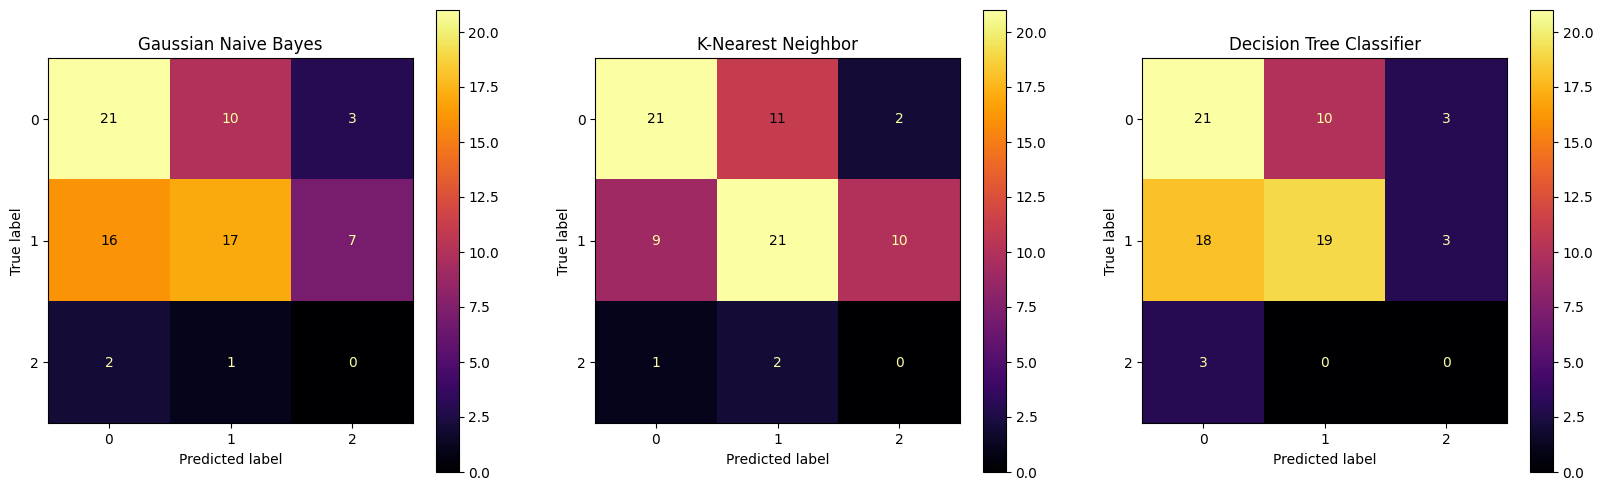

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

Gambar di atas merupakan visualisasi matriks kebingungan (confusion matrix) dari tiga model klasifikasi: Gaussian Naive Bayes, K-Nearest Neighbor, dan Decision Tree Classifier. Disini ukuran matrix nya 3x3 karena saya memiliki 3 class yang diamati.

In [118]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Konversi list gnb_cm menjadi numpy array
gnb_cm = np.array(gnb_cm)

# Ekstraksi nilai tn, fp, fn, dan tp dari matriks konfusi
tn = gnb_cm[0, 0]
fp = np.sum(gnb_cm[0, 1:])  # Jumlah semua nilai pada baris pertama kecuali elemen di diagonal utama
fn = np.sum(gnb_cm[1:, 0])  # Jumlah semua nilai pada kolom pertama kecuali elemen di diagonal utama
tp = np.sum(gnb_cm[1:, 1:])  # Jumlah semua nilai pada matriks konfusi kecuali baris dan kolom pertama

# Perhitungan metrik evaluasi
accuracy = (tp + tn) / np.sum(gnb_cm)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = (2 * precision * recall) / (precision + recall)

# Menghitung ROC AUC Score
y_true = np.array([0] * tn + [1] * fp + [1] * fn + [1] * tp)  # Membuat array y_true dari matriks konfusi
y_score = np.array([0] * (tn + fp) + [1] * (fn + tp))  # Membuat array y_score dari matriks konfusi
roc_score = roc_auc_score(y_true, y_score)

# Tampilkan hasil
print("Nilai Akurasi: ", accuracy)
print("Nilai Presisi: ", precision)
print("Nilai Recall: ", recall)
print("Nilai F1-Score: ", f1_score)
print("Nilai ROC AUC Score: ", roc_score)

Nilai Akurasi:  0.5974025974025974
Nilai Presisi:  0.6578947368421053
Nilai Recall:  0.5813953488372093
Nilai F1-Score:  0.6172839506172839
Nilai ROC AUC Score:  0.8839285714285714


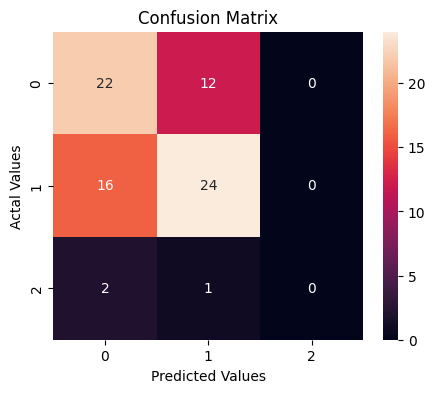

In [119]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#training the classifier using X_Train and y_train
clf = SVC(kernel = 'linear').fit(x_train,y_train)
clf.predict(x_train)
#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(x_test)
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index=[0, 1, 2],
                     columns=[0, 1, 2])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

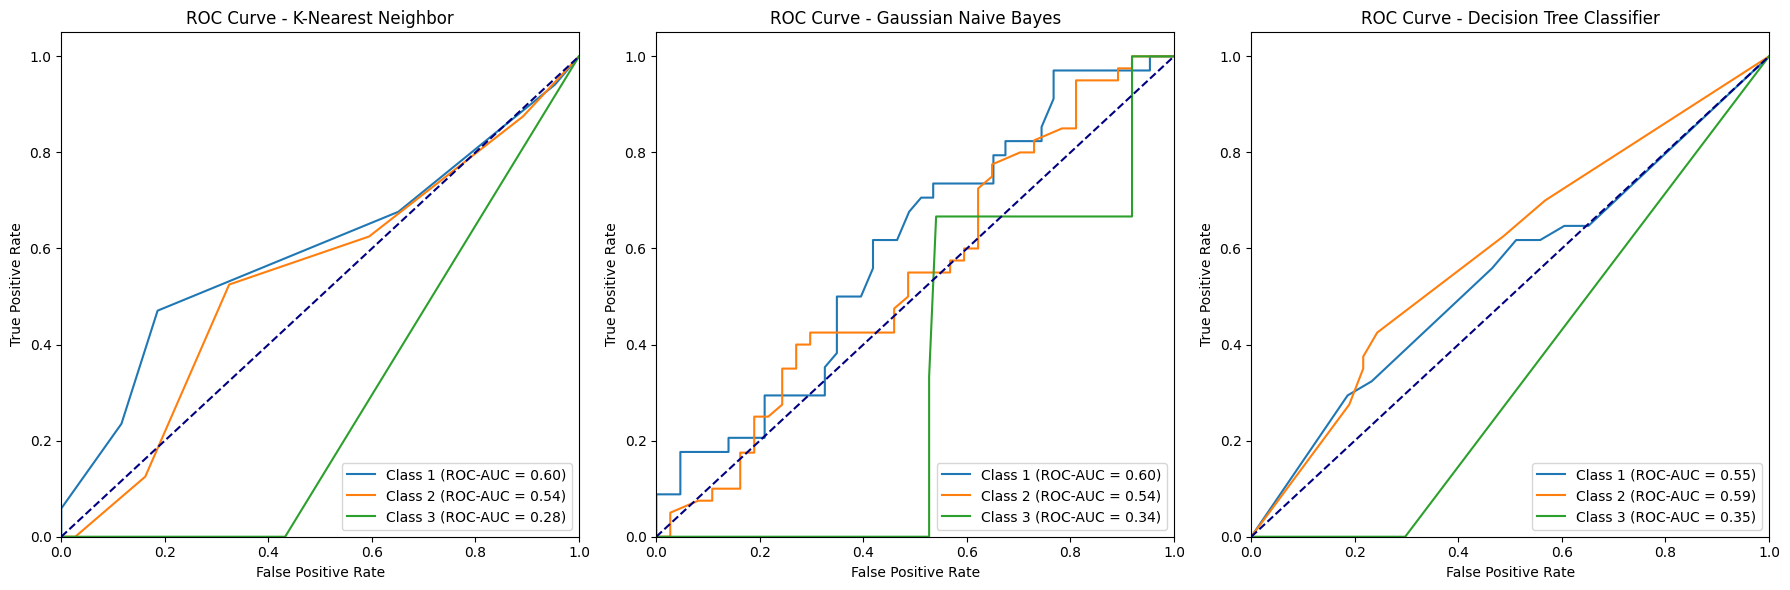

In [120]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

# Inisialisasi subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop melalui setiap model
for model, name, ax in zip(models, model_names, axes):
    # Mengambil prediksi probabilitas dari model
    y_pred_proba = model.predict_proba(x_test_norm)

    # Menginisialisasi variabel untuk menyimpan nilai AUC untuk setiap kelas
    roc_auc = []

    # Loop melalui setiap kelas
    for i in range(len(model.classes_)):
        # Membuat label biner untuk kelas tertentu
        y_test_bin = (y_test == model.classes_[i])

        # Menghitung kurva ROC dan AUC untuk kelas tersebut
        fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba[:, i])
        roc_auc.append(roc_auc_score(y_test_bin, y_pred_proba[:, i]))

        # Plot kurva ROC untuk kelas tersebut
        ax.plot(fpr, tpr, label=f'Class {model.classes_[i]} (ROC-AUC = {roc_auc[-1]:.2f})')

    # Plot garis referensi
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

# Menyusun layout dan menampilkan plot
plt.tight_layout()
plt.show()

##**Review Process**

###**Cross Validation**

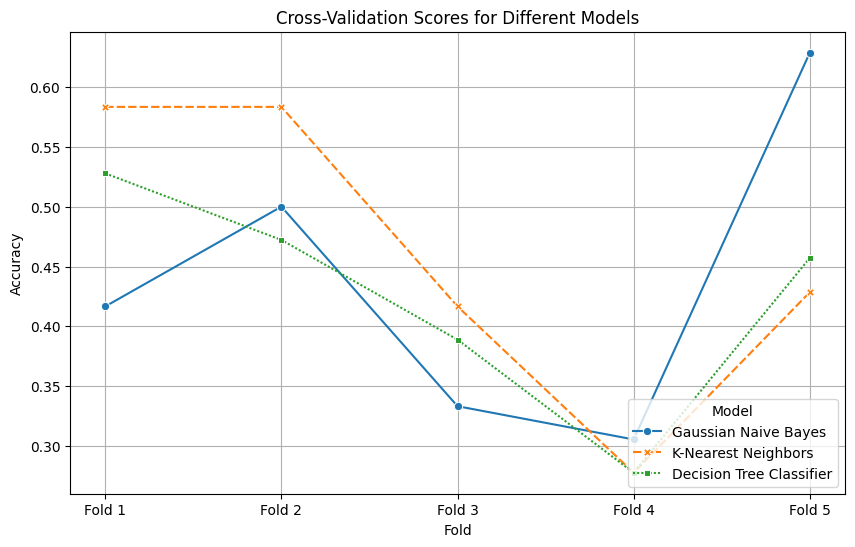

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Visualisaasi di atas adalah perbandingkan performa relatif dari masing-masing model berdasarkan akurasi yang dihasilkan selama proses validasi silang.

###**Feature Selection**

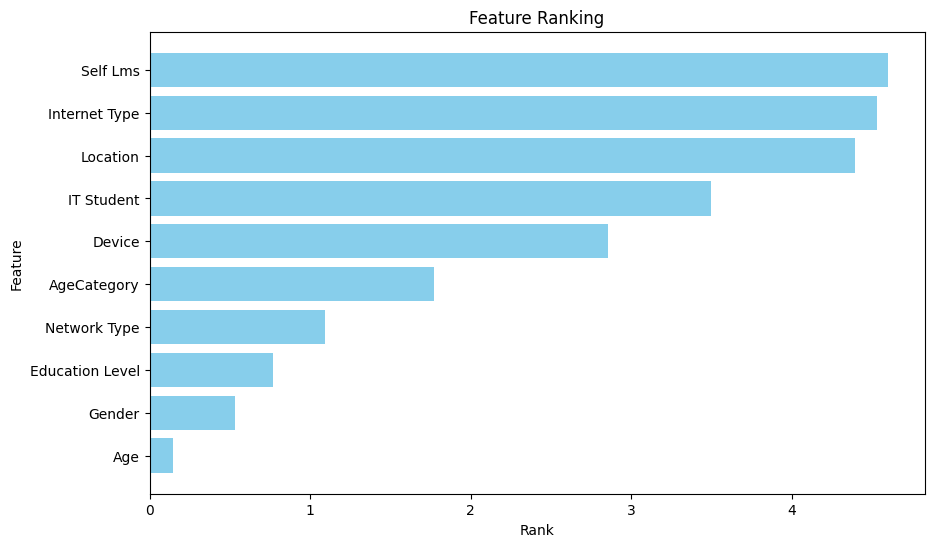

In [122]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k=10)

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Disini dilakukan seleksi fitur menggunakan uji chi-square dan menampilkan peringkat fitur-fitur berdasarkan skornya. Skor tersebut menunjukkan seberapa besar pengaruh fitur terhadap target yang diprediksi. Dapat terlihat disini bahwa fitur Selm Lms memiliki skor terbesar yang artinya fitur tersebut berpengaruh besar terhadap target yang  diprediksi dan fitur Age memiliki skor yang rendah artinya fitur Age kurang relevaan dengan target yang diprediksi.

Feature Selection Pakai Algoritma DTC

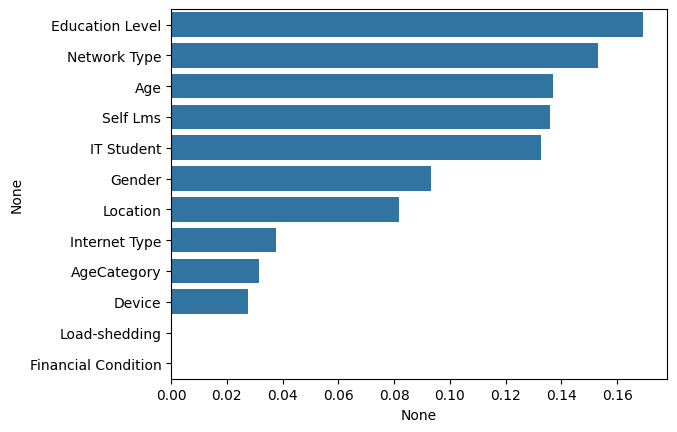

In [123]:
feature_imp = pd.Series(dtc.feature_importances_, index=x.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

ini merupakan plot yang menampilkan fitur mana yang paling penting dalam membuat prediksi menggunakan algoritma DTC. Dapat terlihat disini bahwa fitur Education Level menempati posisi paling atas yang artinya fitur ini lah yang paling penting dalam membuat prediksi lalu dilanjutkan dengan fitur Network Type, Age, Self Lms, IT Student, Gender, Location, Internet Type, Age Category, dan device. Sedangkan fitur Load-shedding dan Financial Condition disini tidak cukup penting karena persentase nya 0.00.

###**Tuning Hyperparameter**

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 1.0}
Akurasi sebelum tuning: 0.4935064935064935
Akurasi setelah tuning: 0.5584415584415584


In [131]:
gnb = GaussianNB(var_smoothing=1.0)

Parameter terbaik yang ditemukan untuk model Naive Bayes Gaussian adalah 'var_smoothing' dengan nilai 1.0. Akurasi model meningkat setelah dilakukan tuning, dari 49.35% menjadi 55.84%.